Name: Nishit Patel napn9w@umsystem.edu
Course: CS 5400

Programming Assignment 03: Classifying Unknown Animals as Mammal or Not Mammal

Date: 07-16-22

In [1]:
# imported for data management (dataframe)
import pandas as pd 

# This package needs part of anaconda and needs to be installed
# conda install -c conda-forge-wordcloud

# Imported  to allow for the display of word clouds 
import matplotlib.pyplot as plt 

# Imported to create train/test partitioning of the data 
from sklearn.model_selection import train_test_split

# Imported to get frequency counts 
import collections 

# Imported to use confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Concept Description:
Train a system existing data to classify *animals* as either mammal or not mammal.

# Data collection: 
The data has been provided by Perry B. Koob, not professor or doctor as a part of our assignment on canvas.

# Example Description:

Animmal name - This is a nominal attribute that contains the name of the animal.

Hair - This a nomianal and boolean attribute that describes if the animal has hair.

Feathers - This a nomianal and boolean attribute that describes if the animal has feathers.

Eggs - This a nomianal and boolean attribute that describes if the animal lays eggs.

Milk - This a nomianal and boolean attribute that describes if the animal gives milk

Airborne - This a nomianal and boolean attribute that describes if the animal is a airborne

Aquatic - This a nomianal and boolean attribute that describes if the animal lives in water

Predator - This a nomianal and boolean attribute that describes if the animal feeds on other animals

Toothed - This a nomianal and boolean attribute that describes if the animal has hteeth.

Backbone - This a nomianal and boolean attribute that describes if the animals have backbone

Breathes - This a nomianal and boolean attribute that describes if the animals breathes

Venemous - This a nomianal and boolean attribute that describes if the animal is venomous

Fine - This a nomianal and boolean attribute that describes if the animal has fins

Legs - This a nomianal and boolean attribute that describes if the animal has legs as: 0 legs 2 legs 4 legs 5 legs 6 legs 8 legs 12 legs

Tail - This a nomianal and boolean attribute that describes if the animal has tail

Domestic - This a nomianal and boolean attribute that describes if the animal is domestic

Catsize - This a nomianal and boolean attribute that describes if the animal is catsize.

Gestation - This is an interval attribute that describes the animal's gestation period and has missing values 

Type - This a nomianal and boolean attribute used to identify the type of the animal

Ismammal - This is a binary class label generated from the type class label. It is a transformation of a nominal class label, so it is also nominal. The labels are now mammal and not mammal

Degestation - The values are discretized and generated from the interval attribute gestation.

# Data Import and wrangling:

The results of each search is read from the respective excel into spearate dataframes. careful attrention is paid to make sure the data is read in as character strings.


In [2]:
df = pd.read_excel("/content/sample_data/animal-taxonomy.xlsx", dtype=str)

df.columns



Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'gestation', 'type'],
      dtype='object')

In [28]:
df.loc[(df['type'] == 'mammal'), 'ismammal'] = 'mammal'
df.loc[(df['type'] != 'mammal'), 'ismammal'] = 'non-mammal'

df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'gestation', 'type',
       'ismammal'],
      dtype='object')

In [29]:

#dropping null values since gestation attribute has NaN
df = df[df['gestation'].notna()]

df.dropna()



animal name   hair feathers   eggs   milk airborne aquatic predator  \
0       aardvark   True    False  False   True    False   False     True   
1          anole  False    False   True  False    False   False    False   
2       antelope   True    False  False   True    False   False    False   
3        axolotl  False    False   True  False    False    True    False   
4           bass  False    False   True  False    False    True     True   
..           ...    ...      ...    ...    ...      ...     ...      ...   
126      wallaby   True    False  False   True    False   False    False   
127         wasp   True    False   True  False     True   False    False   
128  whale shark  False    False  False  False    False   False    False   
129         wolf   True    False  False   True    False   False     True   
131         wren  False     True   True  False     True   False    False   

    toothed backbone breathes venomous   fins legs   tail domestic catsize  \
0      True     True     True    False  False    4  False    False    True   
1      True     True     True    False  False    4   True    False   False   
2      True     True     True    False  False    4   True    False    True   
3      True     True    False    False  False    4   True    False   False   
4      True     True    False    False   True    0   True    False   False   
..      ...      ...      ...      ...    ...  ...    ...      ...     ...   
126    True     True     True    False  False    2   True    False    True   
127   False    False     True     True  False    6  False    False   False   
128    True     True    False    False   True    0   True    False   False   
129    True     True     True    False  False    4   True    False    True   
131   False     True     True    False  False    2   True    False   False   

    gestation       type    ismammal  
0         213     mammal      mammal  
1          42    reptile  non-mammal  
2         274     mammal      mammal  
3          17  amphibian  non-mammal  
4           5       fish  non-mammal  
..        ...        ...         ...  
126        30     mammal      mammal  
127        88     insect  non-mammal  
128       360       fish  non-mammal  
129        68     mammal      mammal  
131        15       bird  non-mammal  

[126 rows x 20 columns]

In [5]:
df.isna().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
gestation      False
type           False
ismammal       False
dtype: bool

# Partition the data into a training set and a test set using a 85/15 split.

In [34]:
X = df.drop(columns=['type','ismammal'])
Y = df[['ismammal']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 1)



# Exploratory Data Analysis:
Looking into what type of measure the attributes are.

In [35]:
df.describe()


animal name   hair feathers  eggs   milk airborne aquatic predator  \
count          126    126      126   126    126      126     126      126   
unique         126      2        2     2      2        2       2        2   
top       aardvark  False    False  True  False    False   False     True   
freq             1     73      106    71     75      101      80       67   

       toothed backbone breathes venomous   fins legs  tail domestic catsize  \
count      126      126      126      126    126  126   126      126     126   
unique       2        2        2        2      2    7     2        2       2   
top       True     True     True    False  False    4  True    False   False   
freq        87      105       96      115    105   53    96      113      78   

       gestation    type    ismammal  
count        126     126         126  
unique        80       9           2  
top           42  mammal  non-mammal  
freq           7      50          76

# Here, I've plotted graphs for each attribute

Text(0, 0.5, 'count')

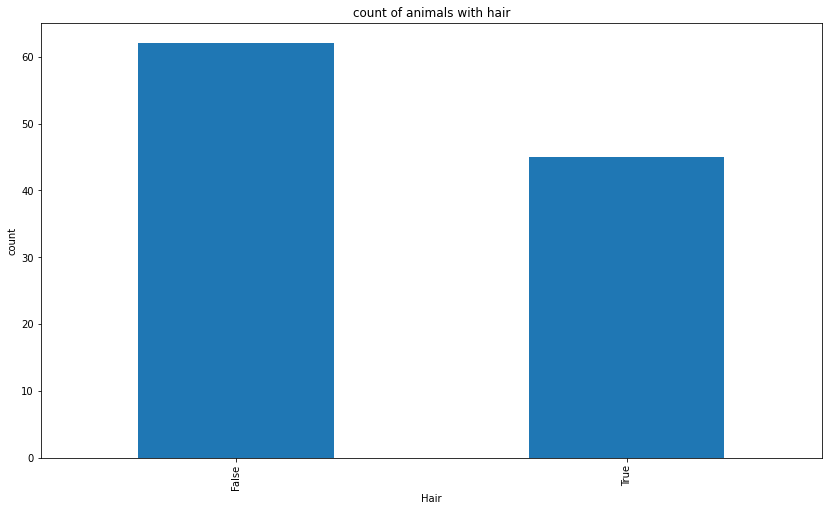

In [36]:
# Hair
plot = X_train['hair'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals with hair")
plot.set_xlabel("Hair")
plot.set_ylabel("count")



Text(0, 0.5, 'count')

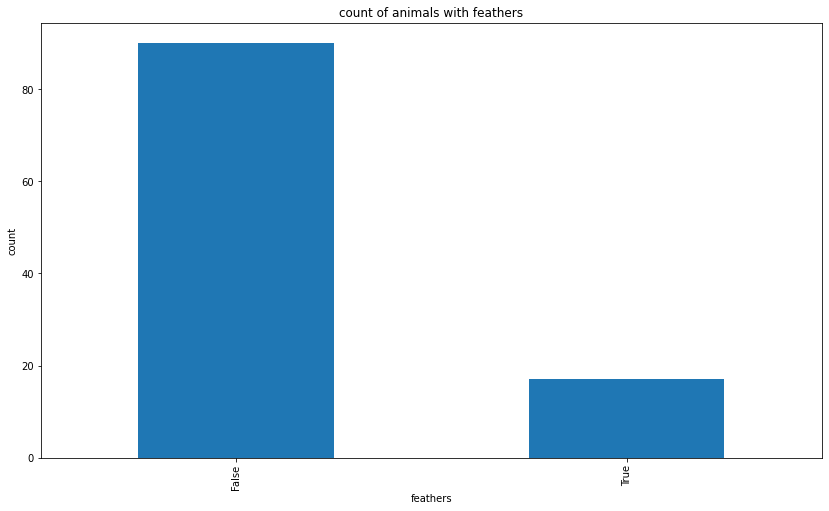

In [37]:
# Feathers
plot = X_train['feathers'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals with feathers")
plot.set_xlabel("feathers")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

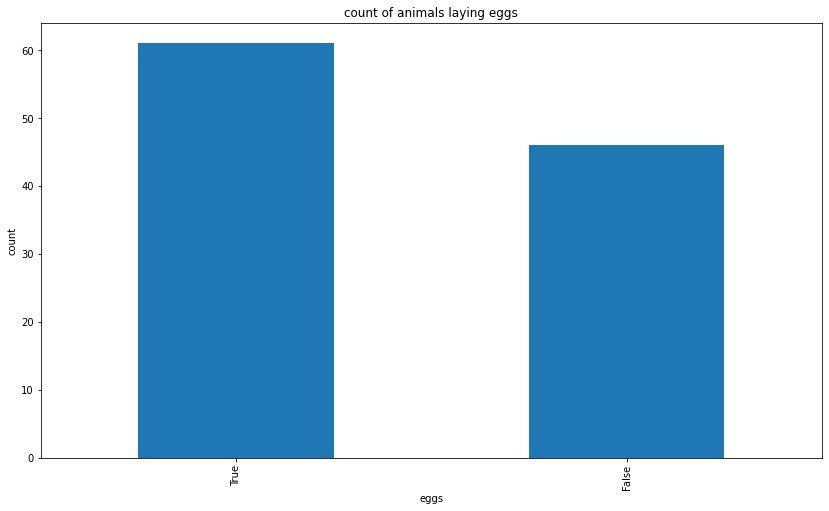

In [38]:
# EggS
plot = X_train['eggs'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals laying eggs")
plot.set_xlabel("eggs")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

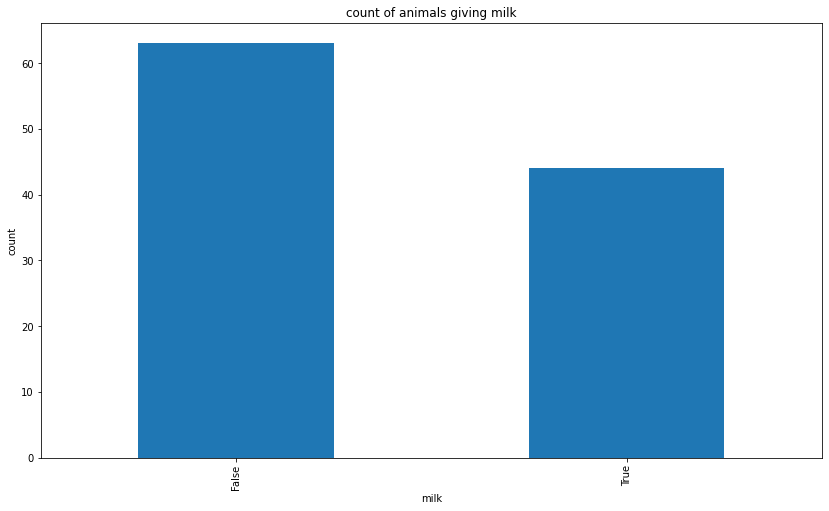

In [39]:
# Milk
plot = X_train['milk'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals giving milk")
plot.set_xlabel("milk")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

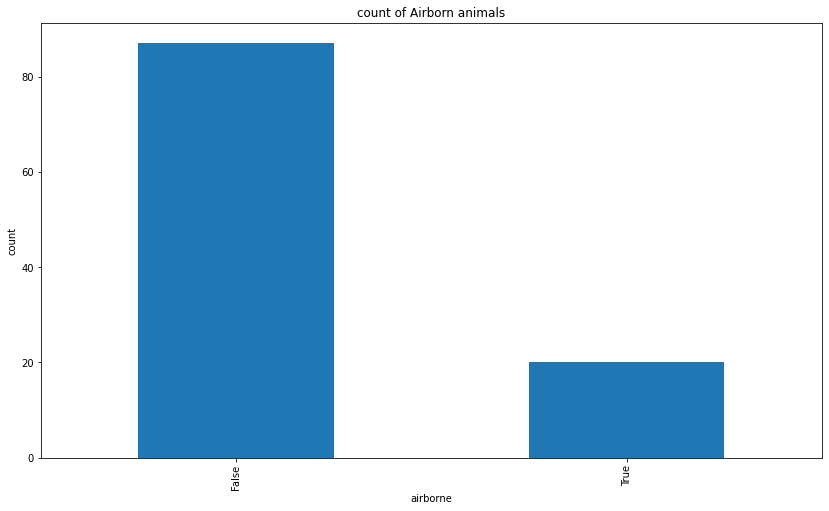

In [40]:
# Airbone
plot = X_train['airborne'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of Airborn animals")
plot.set_xlabel("airborne")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

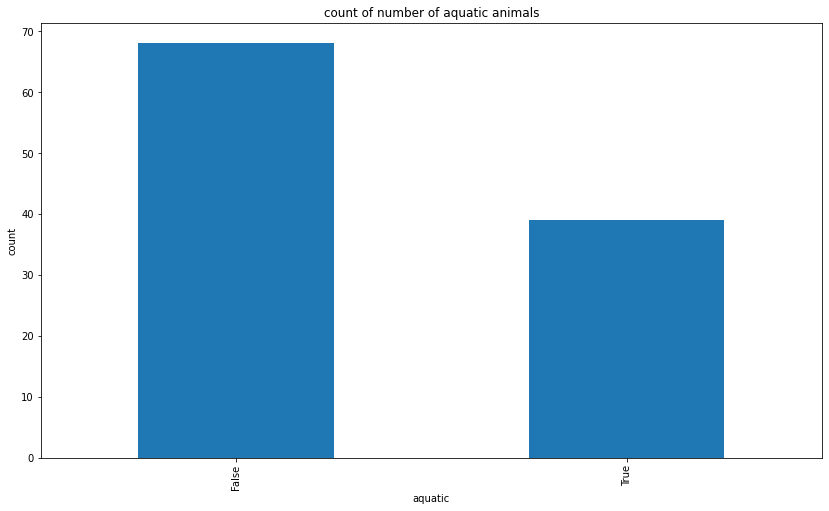

In [41]:
# Aquatic
plot = X_train['aquatic'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of number of aquatic animals")
plot.set_xlabel("aquatic")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

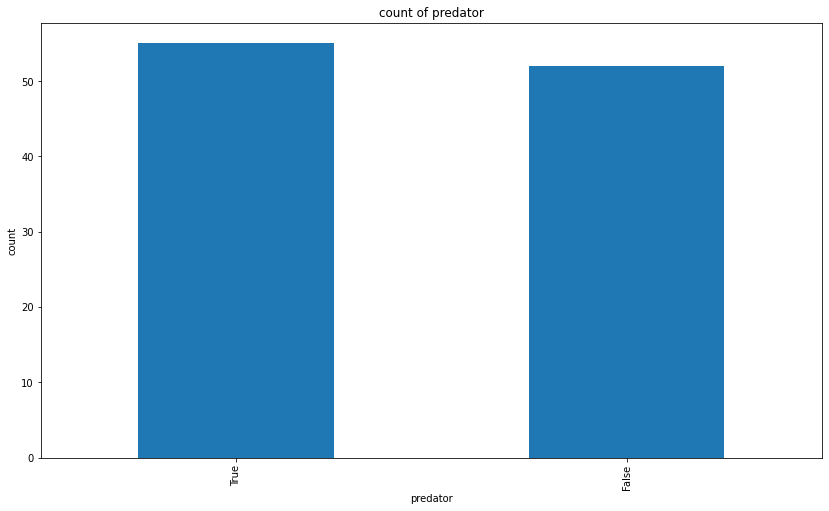

In [42]:
# Predator
plot = X_train['predator'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of predator")
plot.set_xlabel("predator")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

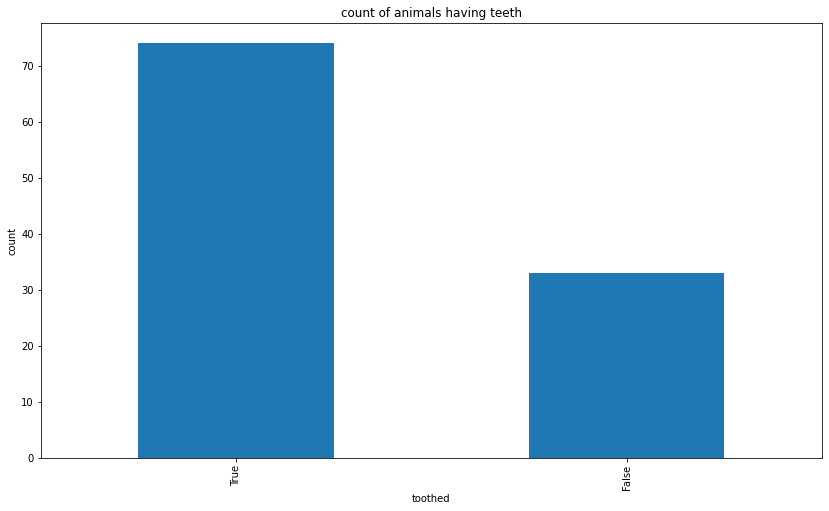

In [43]:
# Toothed
plot = X_train['toothed'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals having teeth")
plot.set_xlabel("toothed")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

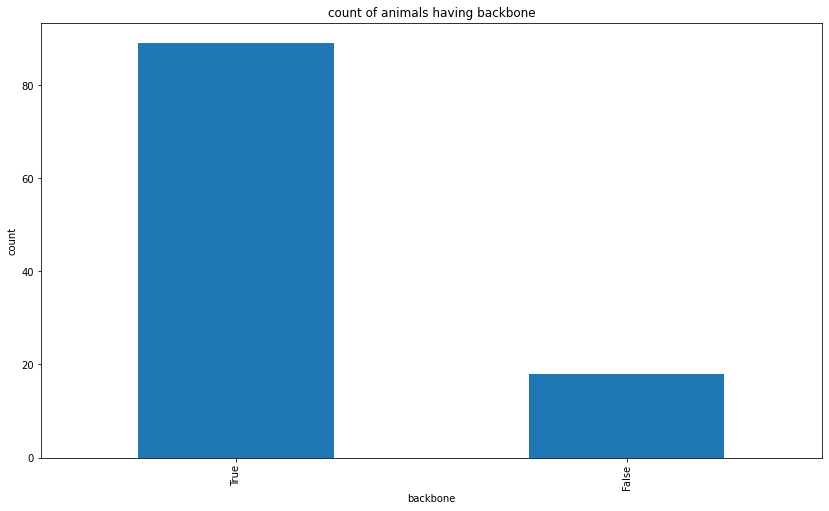

In [44]:
# Backbone
plot = X_train['backbone'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals having backbone")
plot.set_xlabel("backbone")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

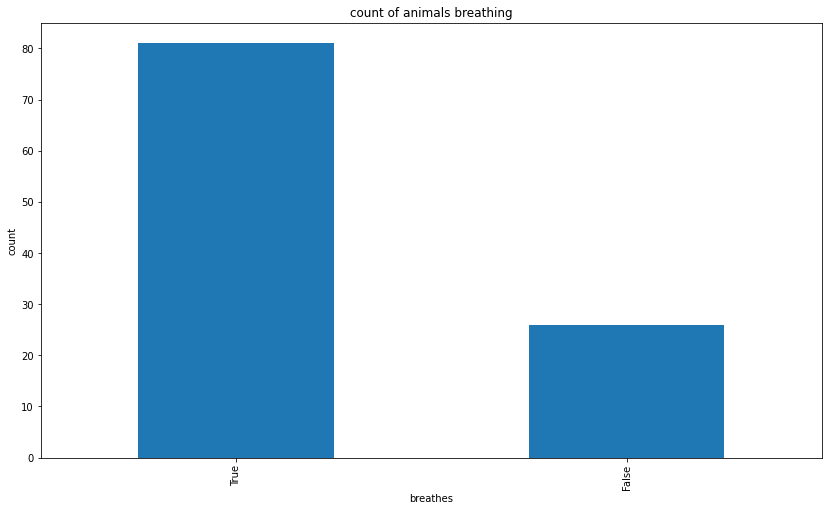

In [45]:
# Breathes
plot = X_train['breathes'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals breathing")
plot.set_xlabel("breathes")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

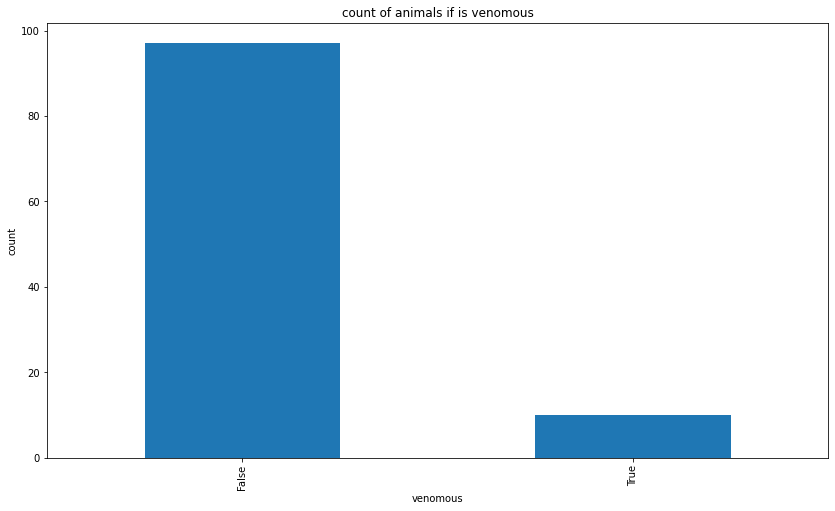

In [46]:
# Venomous
plot = X_train['venomous'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals if is venomous")
plot.set_xlabel("venomous")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

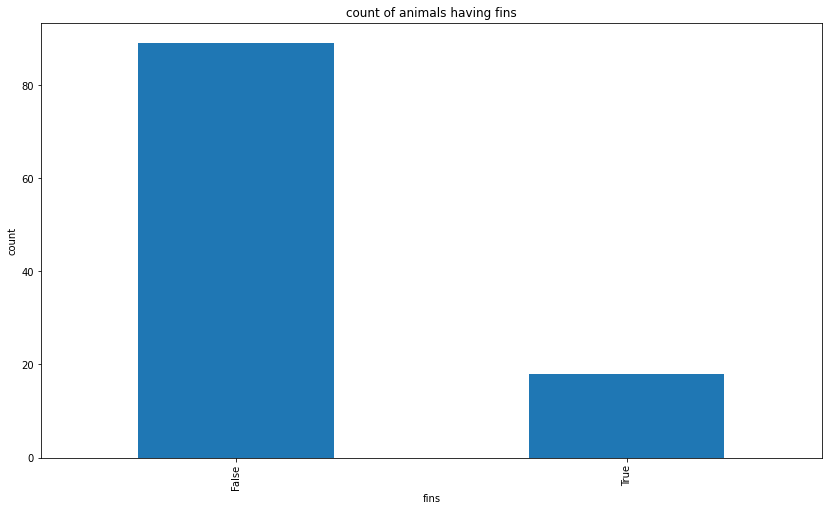

In [47]:
# Fins
plot = X_train['fins'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals having fins")
plot.set_xlabel("fins")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

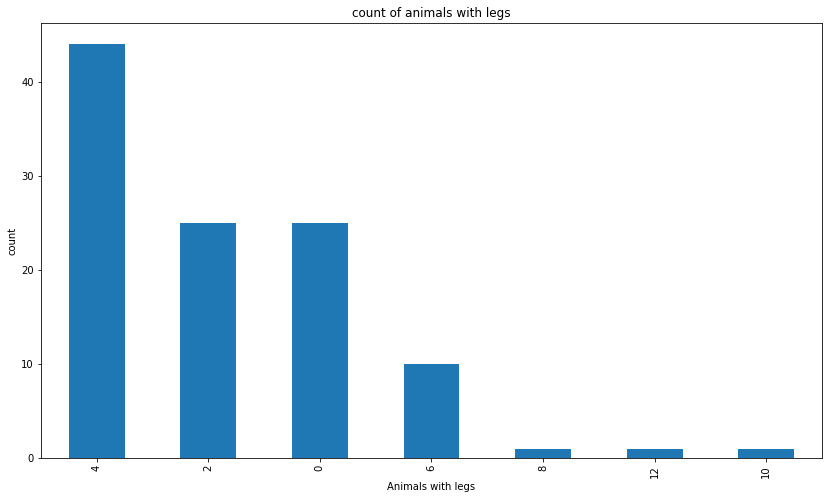

In [48]:
# Legs
plot = X_train['legs'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals with legs")
plot.set_xlabel("Animals with legs")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

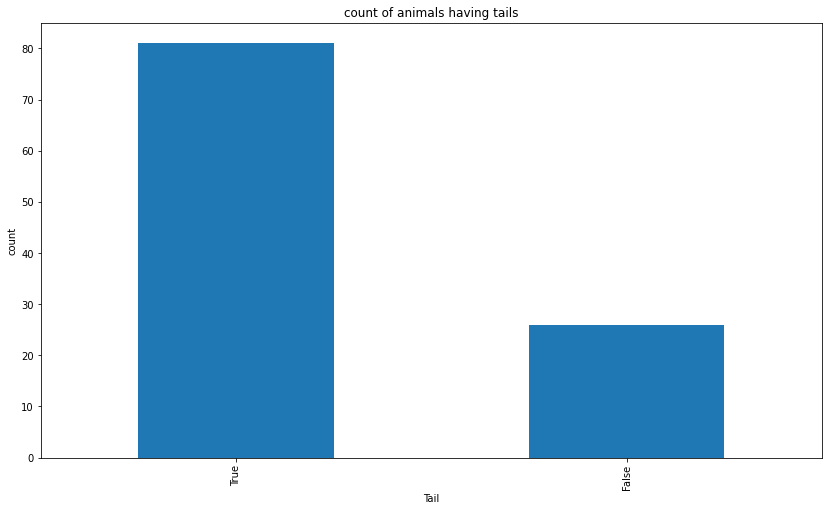

In [49]:
# Tail
plot = X_train['tail'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals having tails")
plot.set_xlabel("Tail")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

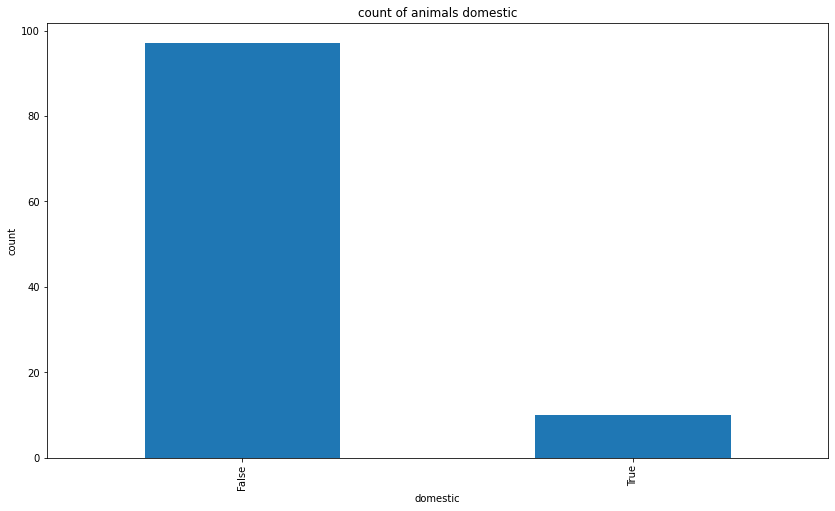

In [50]:
# Domestic
plot = X_train['domestic'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals domestic")
plot.set_xlabel("domestic")
plot.set_ylabel("count")

Text(0, 0.5, 'count')

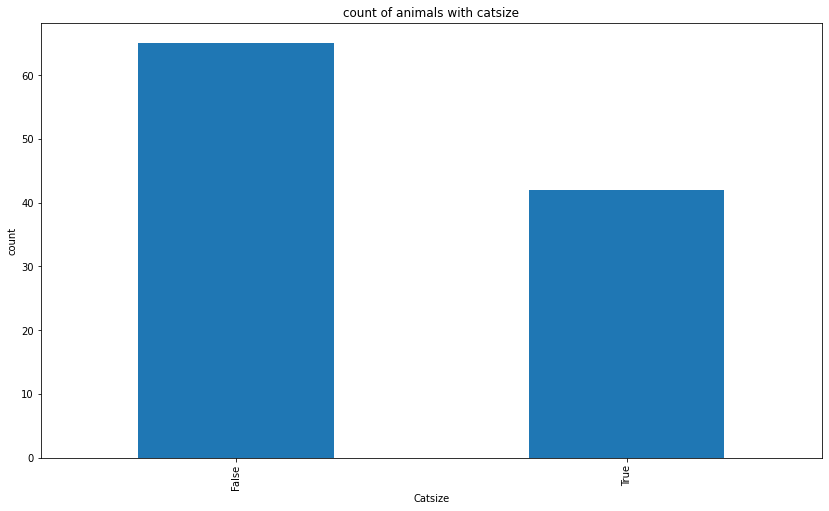

In [51]:
# Catsize
plot = X_train['catsize'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animals with catsize")
plot.set_xlabel("Catsize")
plot.set_ylabel("count")

In [52]:
Y_train

ismammal
2        mammal
55   non-mammal
111  non-mammal
116  non-mammal
49   non-mammal
..          ...
10       mammal
73   non-mammal
13       mammal
110  non-mammal
38       mammal

[107 rows x 1 columns]

Text(0, 0.5, 'Count')

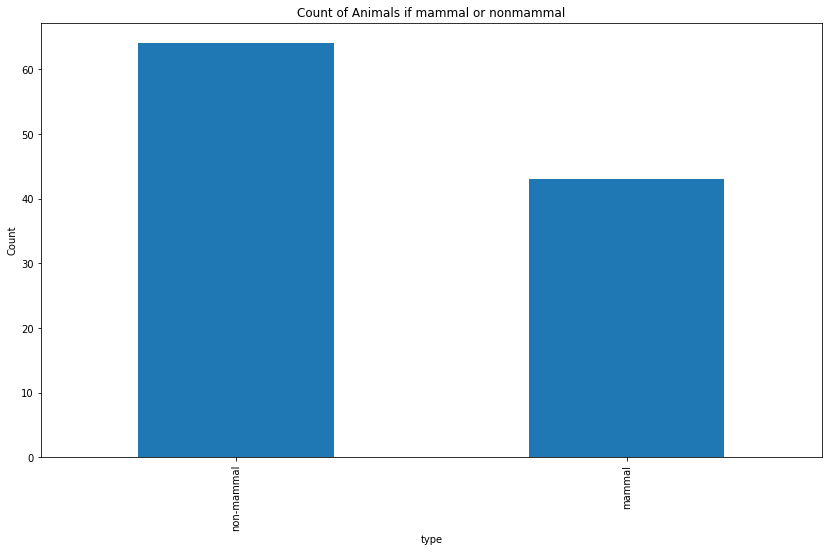

In [53]:
#ismammal
plot = Y_train['ismammal'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Animals if mammal or nonmammal")
plot.set_xlabel("type")
plot.set_ylabel("Count")

Text(0, 0.5, 'count')

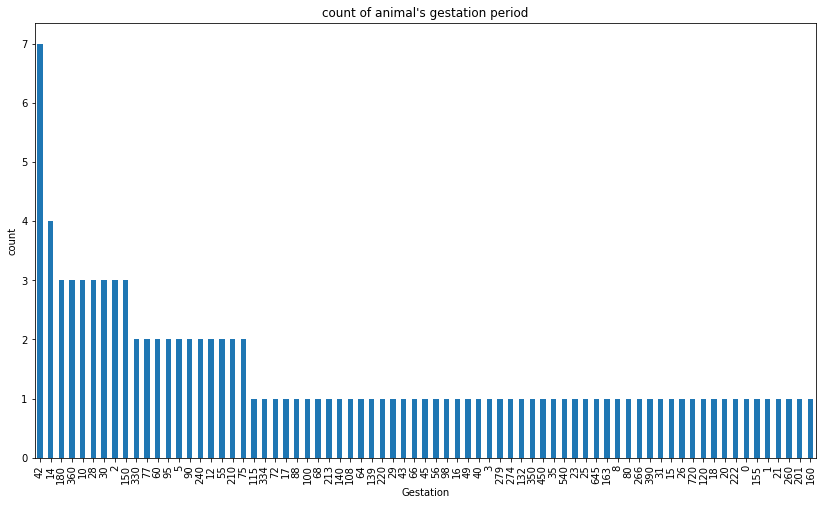

In [56]:
# gestation
plot = X_train['gestation'].value_counts().plot(kind = 'bar', figsize=(14,8), title = "count of animal's gestation period")
plot.set_xlabel("Gestation")
plot.set_ylabel("count")

In [57]:
X_train['gestation'].describe()

count     107
unique     73
top        42
freq        7
Name: gestation, dtype: object

In [58]:
X_train['gestation']= X_train['gestation'].astype('int')
X_train.loc[(X_train['gestation'] <= 2), 'degestation'] = 0
X_train.loc[(X_train['gestation'] > 2), 'degestation'] = 1
X_train = X_train.drop(columns = ['gestation'])

In [59]:
X_test['gestation']= X_test['gestation'].astype('int')
X_test.loc[(X_test['gestation'] <= 2), 'degestation'] = 0
X_test.loc[(X_test['gestation'] > 2), 'degestation'] = 1
X_test = X_test.drop(columns = ['gestation'])

#Mining or Analytics:

using two way tables to get frequency per class.

In [60]:
# Hair
hair_col = pd.crosstab(index = X_train["hair"], columns = Y_train["ismammal"], margins = True)
hair_col

ismammal  mammal  non-mammal  All
hair                             
False          2          60   62
True          41           4   45
All           43          64  107

Based on the frequency of mammal count and mammal count, we can generate the following rule set for the hair attrbute:

True - mammal

False - non mammal

now we determine the error rate of the hair column rules.




In [62]:
error = 0
error += hair_col.loc['True', 'non-mammal']
error += hair_col.loc['False', 'mammal']
error_rate = error/hair_col.loc['All', 'All']
error_rate

0.056074766355140186

In [63]:
#feathers
feathers_col = pd.crosstab(index = X_train ["feathers"], columns = Y_train["ismammal"], margins= True)
feathers_col

ismammal  mammal  non-mammal  All
feathers                         
False         43          47   90
True           0          17   17
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the feathers attribute

True - non-mammal
False- non-mammal

Now we detemine the error rate of the feathers rules 

In [64]:
error = 0
error += feathers_col.loc['True', 'non-mammal']
error += feathers_col.loc['False', 'mammal']
error_rate = error/feathers_col.loc['All', 'All']
error_rate

0.5607476635514018

In [65]:
# Eggs
eggs_col = pd.crosstab(index = X_train ["eggs"], columns = Y_train["ismammal"], margins= True)
eggs_col


ismammal  mammal  non-mammal  All
eggs                             
False         42           4   46
True           1          60   61
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the eggs attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the eggs rules 

In [66]:
error = 0
error += eggs_col.loc['True', 'non-mammal']
error += eggs_col.loc['False', 'mammal']
error_rate = error/eggs_col.loc['All', 'All']
error_rate

0.9532710280373832

In [67]:
# Milk
milk_col = pd.crosstab(index = X_train ["milk"], columns = Y_train["ismammal"], margins= True)
milk_col

ismammal  mammal  non-mammal  All
milk                             
False          0          63   63
True          43           1   44
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the milk attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the milk rules 

In [68]:
error = 0
error += milk_col.loc['True', 'non-mammal']
error += milk_col.loc['False', 'mammal']
error_rate = error/milk_col.loc['All', 'All']
error_rate

0.009345794392523364

In [69]:
# Airborn
airborn_col = pd.crosstab(index = X_train ["milk"], columns = Y_train["ismammal"], margins= True)
airborn_col


ismammal  mammal  non-mammal  All
milk                             
False          0          63   63
True          43           1   44
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the airborn attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the airborn rules 

In [70]:
error = 0
error += airborn_col.loc['True', 'non-mammal']
error += airborn_col.loc['False', 'mammal']
error_rate = error/airborn_col.loc['All', 'All']
error_rate

0.009345794392523364

In [71]:
# aquatic
aquatic_col = pd.crosstab(index = X_train ["aquatic"], columns = Y_train["ismammal"], margins= True)
aquatic_col


ismammal  mammal  non-mammal  All
aquatic                          
False         36          32   68
True           7          32   39
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the aquatic attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the aquatic rules 

In [72]:
error = 0
error += aquatic_col.loc['True', 'non-mammal']
error += aquatic_col.loc['False', 'mammal']
error_rate = error/aquatic_col.loc['All', 'All']
error_rate

0.6355140186915887

In [73]:
# predator
predator_col = pd.crosstab(index = X_train ["predator"], columns = Y_train["ismammal"], margins= True)
predator_col


ismammal  mammal  non-mammal  All
predator                         
False         21          31   52
True          22          33   55
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the predator attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the predator rules 

In [74]:
error = 0
error += predator_col.loc['True', 'non-mammal']
error += predator_col.loc['False', 'mammal']
error_rate = error/predator_col.loc['All', 'All']
error_rate

0.5046728971962616

In [75]:
# toothed
toothed_col = pd.crosstab(index = X_train ["toothed"], columns = Y_train["ismammal"], margins= True)
toothed_col


ismammal  mammal  non-mammal  All
toothed                          
False          1          32   33
True          42          32   74
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the toothed attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the toothed rules 

In [76]:
error = 0
error += toothed_col.loc['True', 'non-mammal']
error += toothed_col.loc['False', 'mammal']
error_rate = error/toothed_col.loc['All', 'All']
error_rate

0.308411214953271

In [77]:
# backbone
backbone_col = pd.crosstab(index = X_train ["backbone"], columns = Y_train["ismammal"], margins= True)
backbone_col


ismammal  mammal  non-mammal  All
backbone                         
False          0          18   18
True          43          46   89
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the backbone attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the backbone rules 

In [78]:
error = 0
error += backbone_col.loc['True', 'non-mammal']
error += backbone_col.loc['False', 'mammal']
error_rate = error/backbone_col.loc['All', 'All']
error_rate

0.42990654205607476

In [79]:
# breathes
breathes_col = pd.crosstab(index = X_train ["breathes"], columns = Y_train["ismammal"], margins= True)
breathes_col


ismammal  mammal  non-mammal  All
breathes                         
False          0          26   26
True          43          38   81
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the breathes attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the breathes rules 

In [80]:
error = 0
error += breathes_col.loc['True', 'non-mammal']
error += breathes_col.loc['False', 'mammal']
error_rate = error/breathes_col.loc['All', 'All']
error_rate

0.35514018691588783

In [81]:
# venomous
venomous_col = pd.crosstab(index = X_train ["venomous"], columns = Y_train["ismammal"], margins= True)
venomous_col


ismammal  mammal  non-mammal  All
venomous                         
False         42          55   97
True           1           9   10
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the venomous attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the venomous rules 

In [82]:
error = 0
error += venomous_col.loc['True', 'non-mammal']
error += venomous_col.loc['False', 'mammal']
error_rate = error/venomous_col.loc['All', 'All']
error_rate

0.4766355140186916

In [83]:
# fins
fins_col = pd.crosstab(index = X_train ["fins"], columns = Y_train["ismammal"], margins= True)
fins_col


ismammal  mammal  non-mammal  All
fins                             
False         39          50   89
True           4          14   18
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the fins attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the fins rules 

In [84]:
error = 0
error += fins_col.loc['True', 'non-mammal']
error += fins_col.loc['False', 'mammal']
error_rate = error/fins_col.loc['All', 'All']
error_rate

0.4953271028037383

In [85]:
# legs
legs_col = pd.crosstab(index = X_train ["legs"], columns = Y_train["ismammal"], margins= True)
legs_col


ismammal  mammal  non-mammal  All
legs                             
0              3          22   25
10             0           1    1
12             0           1    1
2              7          18   25
4             33          11   44
6              0          10   10
8              0           1    1
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the legs attribute

0 - non-mammal

2 - non-mammal

4 - mammal

6 - non-mammal

8 - non-mammal

12 - non-mammal


Now we detemine the error rate of the legs rules 

In [86]:
error = 0
error += legs_col.loc['0', 'mammal']
error += legs_col.loc['2', 'mammal']
error += legs_col.loc['4', 'non-mammal']
error += legs_col.loc['6', 'mammal']
error += legs_col.loc['8', 'mammal']
error += legs_col.loc['12', 'mammal']
error_rate = error/legs_col.loc['All', 'All']
error_rate

0.19626168224299065

In [87]:
# tail
tail_col = pd.crosstab(index = X_train ["tail"], columns = Y_train["ismammal"], margins= True)
tail_col


ismammal  mammal  non-mammal  All
tail                             
False          8          18   26
True          35          46   81
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the tail attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the tail rules 

In [88]:
error = 0
error += tail_col.loc['True', 'non-mammal']
error += tail_col.loc['False', 'mammal']
error_rate = error/tail_col.loc['All', 'All']
error_rate

0.5046728971962616

In [89]:
# domestic
domestic_col = pd.crosstab(index = X_train ["domestic"], columns = Y_train["ismammal"], margins= True)
domestic_col


ismammal  mammal  non-mammal  All
domestic                         
False         37          60   97
True           6           4   10
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the domestic attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the domestic rules 

In [90]:
error = 0
error += domestic_col.loc['True', 'non-mammal']
error += domestic_col.loc['False', 'mammal']
error_rate = error/domestic_col.loc['All', 'All']
error_rate

0.38317757009345793

In [91]:
# catsize
catsize_col = pd.crosstab(index = X_train ["catsize"], columns = Y_train["ismammal"], margins= True)
catsize_col


ismammal  mammal  non-mammal  All
catsize                          
False         11          54   65
True          32          10   42
All           43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the catsize attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the catsize rules 

In [92]:
error = 0
error += catsize_col.loc['True', 'non-mammal']
error += catsize_col.loc['False', 'mammal']
error_rate = error/catsize_col.loc['All', 'All']
error_rate

0.19626168224299065

In [93]:
# degestation
degestation_col = pd.crosstab(index = X_train ["degestation"], columns = Y_train["ismammal"], margins= True)
degestation_col


ismammal     mammal  non-mammal  All
degestation                         
0.0               0           5    5
1.0              43          59  102
All              43          64  107

Based on the frequancy of mammal and non mammal count, we aould generate the following rule set for the degestation attribute

True - non-mammal

False- non-mammal

Now we detemine the error rate of the degestation rules 

In [95]:
errors = 0
errors += degestation_col.loc[0,'mammal']
errors += degestation_col.loc[1,'mammal']
error_rate = errors/degestation_col.loc['All','All']

error_rate

0.40186915887850466

#Evaluation:

TRUE - mammal

FALSE - non-mammal

In [100]:
#Determine the predicted values 
prediction = pd.DataFrame(X_test['milk'])
prediction = prediction.rename(columns={'milk':'prediction'})
prediction[prediction['prediction']=='True']='mammal'
prediction[prediction['prediction']=='False']='non-mammal'
Y_test

ismammal
125  non-mammal
47       mammal
74   non-mammal
91       mammal
105  non-mammal
54       mammal
124      mammal
129      mammal
121  non-mammal
43   non-mammal
92       mammal
52   non-mammal
109  non-mammal
36   non-mammal
45   non-mammal
123      mammal
75   non-mammal
107  non-mammal
128  non-mammal

In [101]:
prediction['prediction']

125    non-mammal
47         mammal
74     non-mammal
91         mammal
105    non-mammal
54         mammal
124        mammal
129        mammal
121    non-mammal
43     non-mammal
92         mammal
52     non-mammal
109    non-mammal
36     non-mammal
45     non-mammal
123        mammal
75     non-mammal
107    non-mammal
128    non-mammal
Name: prediction, dtype: object

In [102]:
#confusion Matrix
cm = confusion_matrix(Y_test['ismammal'], prediction['prediction'])
print(cm)

[[ 7  0]
 [ 0 12]]


In [104]:
print("Accuracy Score: ")
print(accuracy_score(Y_test['ismammal'], prediction['prediction']))
print("\n")
print("Report: ")
print(classification_report(Y_test['ismammal'], prediction['prediction']))

Accuracy Score: 
1.0


Report: 
              precision    recall  f1-score   support

      mammal       1.00      1.00      1.00         7
  non-mammal       1.00      1.00      1.00        12

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



After a successfull validation, we feel that the milk rules set would make a good model to determine wheather an animal is a mammal or non-mammal. the Milk rules set are as follows:

True - mammal
False - non-mammal

#References:
https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition

Lecture Note: 1R Mushroom.
